![Ames Housing Dataset](ames.png)

In [2]:
import pandas as pd
import numpy as np
import requests as rq
import seaborn as sns
sns.set_theme(style="whitegrid")

import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
pd.set_option("display.max.columns", 150)
pd.set_option("display.max.rows", 150)

# Read Data

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/jads-nl/discover-projects/main/ames-housing/AmesHousing.csv')

In [5]:
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,Av,GLQ,819.0,Unf,0.0,184.0,1003.0,GasA,TA,Y,SBrkr,1003,0,0,1003,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1984.0,Unf,2.0,588.0,TA,TA,Y,120,0,0,0,0,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1983,1983,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,BLQ,301.0,ALQ,324.0,239.0,864.0,GasA,TA,Y,SBrkr,902,0,0,902,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1983.0,Unf,2.0,484.0,TA,TA,Y,164,0,0,0,0,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,

# Exercise 1
Provide a table with descriptive statistics for all included variables and check:

1. Classes of each of the variables (e.g. factors or continuous variables).
1. Descriptive/summary statistics for all continuous variables (e.g. mean, SD, range) and factor variables (e.g. frequencies).
1. Explore missing values


### Create Initial target table

In [6]:
df_ds = pd.DataFrame(df.dtypes)
df_ds.rename(columns={ 0:'DataType'}, inplace=True)
#df_ds


### Classes of the variables

In [7]:
df_ds['Class']=None #Add empty column to dataframe

mask_categorical = df_ds['DataType'] == 'object'
mask_continuous  = df_ds['DataType'] != 'object'

df_ds.loc[mask_categorical, 'Class'] = 'Categorical'
df_ds.loc[mask_continuous , 'Class'] = 'Continuous'

#df_ds

### Descriptive Statistics
1. Statistics for Continuous variables

In [8]:
df_ds = pd.merge(df_ds, df.describe().T, how='left', left_index=True, right_index=True)

2. Frequencies for Categorical variables

In [9]:
 df_ds = pd.merge(df_ds,df.agg(['count', 'size', 'nunique']).T, how='left', left_index=True, right_index=True) 

3. Missing Values

In [10]:
df_ds = pd.merge(df_ds, pd.DataFrame(df.isnull().sum(), columns=['Miss#']), how='left', left_index=True, right_index=True)
df_ds['Miss%'] = (df_ds["Miss#"]/df_ds["size"])*100

In [11]:
# Missing values for Continous vars
df_ds[(df_ds['Class']=='Continuous') & (df_ds['Miss#']>0)]

,DataType,Class,count_x,mean,std,min,25%,50%,75%,max,count_y,size,nunique,Miss#,Miss%
Lot Frontage,float64,Continuous,2440.0,69.224590,23.365335,21.0,58.0,68.0,80.0,313.0,2440,2930,128,490,16.723549
Mas Vnr Area,float64,Continuous,2907.0,101.896801,179.112611,0.0,0.0,0.0,164.0,1600.0,2907,2930,445,23,0.784983
BsmtFin SF 1,float64,Continuous,2929.0,442.629566,455.590839,0.0,0.0,370.0,734.0,5644.0,2929,2930,995,1,0.034130
BsmtFin SF 2,float64,Continuous,2929.0,49.722431,169.168476,0.0,0.0,0.0,0.0,1526.0,2929,2930,274,1,0.034130
Bsmt Unf SF,float64,Continuous,2929.0,559.262547,439.494153,0.0,219.0,466.0,802.0,2336.0,2929,2930,1137,1,0.034130
Total Bsmt SF,float64,Continuous,2929.0,1051.614544,440.615067,0.0,793.0,990.0,1302.0,6110.0,2929,2930,1058,1,0.034130
Bsmt Full Bath,float64,Continuous,2928.0,0.431352,0.524820,0.0,0.0,0.0,1.0,3.0,2928,2930,4,2,0.068259
Bsmt Half Bath,float64,Continuous,2928.0,0.061134,0.245254,0.0,0.0,0.0,0.0,2.0,2928,2930,3,2,0.068259
Garage Yr Blt,float64,Continuous,2771.0,1978.132443,25.528411,1895.0,1960.0,1979.0,2002.0,2207.0,2771,2930,103,159,5.426621
Garage Cars,float64,Continuous,2929.0,1.766815,0.760566,0.0,1.0,2.0,2.0,5.0,2929,2930,6,1,0.034130


4. Add Median (= 50% column)

In [12]:
df_ds['Median'] = df_ds['50%']

In [13]:
mask_missing=(df_ds['Miss#']>0)
df_ds[mask_missing]

,DataType,Class,count_x,mean,std,min,25%,50%,75%,max,count_y,size,nunique,Miss#,Miss%,Median
Lot Frontage,float64,Continuous,2440.0,69.224590,23.365335,21.0,58.0,68.0,80.0,313.0,2440,2930,128,490,16.723549,68.0
Alley,object,Categorical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,198,2930,2,2732,93.242321,NaN
Mas Vnr Type,object,Categorical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2907,2930,5,23,0.784983,NaN
Mas Vnr Area,float64,Continuous,2907.0,101.896801,179.112611,0.0,0.0,0.0,164.0,1600.0,2907,2930,445,23,0.784983,0.0
Bsmt Qual,object,Categorical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850,2930,5,80,2.730375,NaN
Bsmt Cond,object,Categorical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850,2930,5,80,2.730375,NaN
Bsmt Exposure,object,Categorical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2847,2930,4,83,2.832765,NaN
BsmtFin Type 1,object,Categorical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850,2930,6,80,2.730375,NaN
BsmtFin SF 1,float64,Continuous,2929.0,442.629566,455.590839,0.0,0.0,370.0,734.0,5644.0,2929,2930,995,1,0.034130,370.0
BsmtFin Type 2,object,Categorical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2849,2930,6,81,2.764505,NaN


# Exercise 2
There a several missing values in the dataset, which need to be tackled before we can proceed with the rest of the analysis. There are many ways to impute missing values, but for now, impute missing values as follows:

Use the median for numeric variables
Use the label "100" in all factor variables

## Get column names with missing values for categorical and continuous variables

In [14]:
#mask_missing = df_ds['Miss#']>0 & df_ds['Class']=='Categorical'
mask_miss_continuous  = (df_ds['Class']=='Continuous')  & (df_ds['Miss#']>0)
mask_miss_categorical = (df_ds['Class']=='Categorical') & (df_ds['Miss#']>0)

miss_cols_continuous  = df_ds[mask_miss_continuous].index.array #List of column names with missing values in df
miss_cols_categorical = df_ds[mask_miss_categorical].index.array #List of column names with missing values in df


## Impute Missing Values for Categorical Variables

In [15]:
impute_value_categorical = '100'

for col in miss_cols_categorical:
    mask_miss = df[col].isna()
    df.loc[mask_miss, col]=impute_value_categorical

df[miss_cols_categorical]

,Alley,Mas Vnr Type,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Electrical,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Pool QC,Fence,Misc Feature
0,100,Stone,TA,Gd,Gd,BLQ,Unf,SBrkr,Gd,Attchd,Fin,TA,TA,100,100,100
1,100,None,TA,TA,No,Rec,LwQ,SBrkr,100,Attchd,Unf,TA,TA,100,MnPrv,100
2,100,BrkFace,TA,TA,No,ALQ,Unf,SBrkr,100,Attchd,Unf,TA,TA,100,100,Gar2
3,100,None,TA,TA,No,ALQ,Unf,SBrkr,TA,Attchd,Fin,TA,TA,100,100,100
4,100,None,Gd,TA,No,GLQ,Unf,SBrkr,TA,Attchd,Fin,TA,TA,100,MnPrv,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,100,None,TA,TA,Av,GLQ,Unf,SBrkr,100,Detchd,Unf,TA,TA,100,GdPrv,100
2926,100,None,Gd,TA,Av,BLQ,ALQ,SBrkr,100,Attchd,Unf,TA,TA,100,MnPrv,100
2927,100,None,Gd,TA,Av,GLQ,Unf,SBrkr,100,100,100,100,100,100,MnPrv,Shed
2928,100,None,Gd,TA,Av,ALQ,LwQ,SBrkr,TA,Attchd,RFn,TA,TA,100,100,100


## Impute Missing Values for Continuous Variables

In [16]:
for col in miss_cols_continuous:
    mask_miss = df[col].isna()
    df.loc[mask_miss, col]=df_ds.loc[col]['Median']

In [17]:
df[miss_cols_continuous]

,Lot Frontage,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath,Garage Yr Blt,Garage Cars,Garage Area
0,141.0,112.0,639.0,0.0,441.0,1080.0,1.0,0.0,1960.0,2.0,528.0
1,80.0,0.0,468.0,144.0,270.0,882.0,0.0,0.0,1961.0,1.0,730.0
2,81.0,108.0,923.0,0.0,406.0,1329.0,0.0,0.0,1958.0,1.0,312.0
3,93.0,0.0,1065.0,0.0,1045.0,2110.0,1.0,0.0,1968.0,2.0,522.0
4,74.0,0.0,791.0,0.0,137.0,928.0,0.0,0.0,1997.0,2.0,482.0
...,...,...,...,...,...,...,...,...,...,...,...
2925,37.0,0.0,819.0,0.0,184.0,1003.0,1.0,0.0,1984.0,2.0,588.0
2926,68.0,0.0,301.0,324.0,239.0,864.0,1.0,0.0,1983.0,2.0,484.0
2927,62.0,0.0,337.0,0.0,575.0,912.0,0.0,1.0,1979.0,0.0,0.0
2928,77.0,0.0,1071.0,123.0,195.0,1389.0,1.0,0.0,1975.0,2.0,418.0


# Exercise 3
The variable "SalePrice" refers to the price at which a property was sold and hence is the variable of interest for our prediction model ("Y" or dependent variable). Explore Y in terms of:

* Descriptive/summary statistics (e.g. mean, SDs, range)
* Visualize the distribution of Y (e.g. matplotlib or seaborn)
* Visualize the distribution of Y by looking at various subgroups (e.g. create boxplot or scatterplot using matplotlib or seaborn)
* Look at differences between neigbourhoods
* Look at differences between housing style
* Draw a correlation plot to see all correlations between Y and the independent (numeric) variables (Hint: use df.plotting.scatter_matrix or seaborn.pairplot)

In [18]:
Y = 'SalePrice'

In [19]:
pd.DataFrame(df[Y].describe())

,SalePrice
count,2930.000000
mean,180796.060068
std,79886.692357
min,12789.000000
25%,129500.000000
50%,160000.000000
75%,213500.000000
max,755000.000000


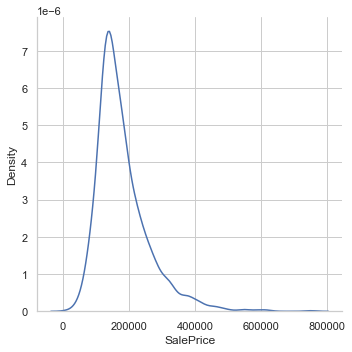

In [20]:
sns.displot(data=df, x=Y, kind='kde')


In [21]:
df_cols=df_ds.index.array

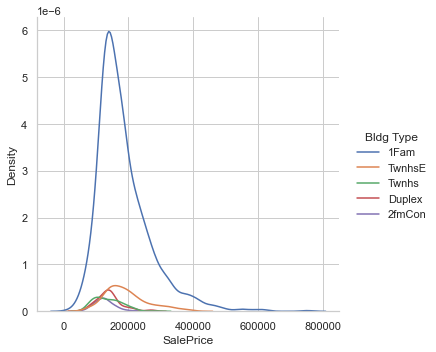

In [22]:
sns.displot(data=df, x=Y, kind='kde',hue='Bldg Type')


<AxesSubplot:xlabel='Year Built', ylabel='SalePrice'>

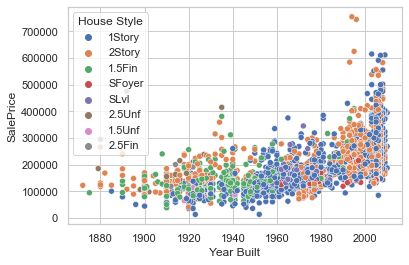

In [23]:
sns.scatterplot(data=df, x="Year Built", y=Y, hue="House Style")


[Text(0, 0, 'NAmes'),
 Text(1, 0, 'Gilbert'),
 Text(2, 0, 'StoneBr'),
 Text(3, 0, 'NWAmes'),
 Text(4, 0, 'Somerst'),
 Text(5, 0, 'BrDale'),
 Text(6, 0, 'NPkVill'),
 Text(7, 0, 'NridgHt'),
 Text(8, 0, 'Blmngtn'),
 Text(9, 0, 'NoRidge'),
 Text(10, 0, 'SawyerW'),
 Text(11, 0, 'Sawyer'),
 Text(12, 0, 'Greens'),
 Text(13, 0, 'BrkSide'),
 Text(14, 0, 'OldTown'),
 Text(15, 0, 'IDOTRR'),
 Text(16, 0, 'ClearCr'),
 Text(17, 0, 'SWISU'),
 Text(18, 0, 'Edwards'),
 Text(19, 0, 'CollgCr'),
 Text(20, 0, 'Crawfor'),
 Text(21, 0, 'Blueste'),
 Text(22, 0, 'Mitchel'),
 Text(23, 0, 'Timber'),
 Text(24, 0, 'MeadowV'),
 Text(25, 0, 'Veenker'),
 Text(26, 0, 'GrnHill'),
 Text(27, 0, 'Landmrk')]

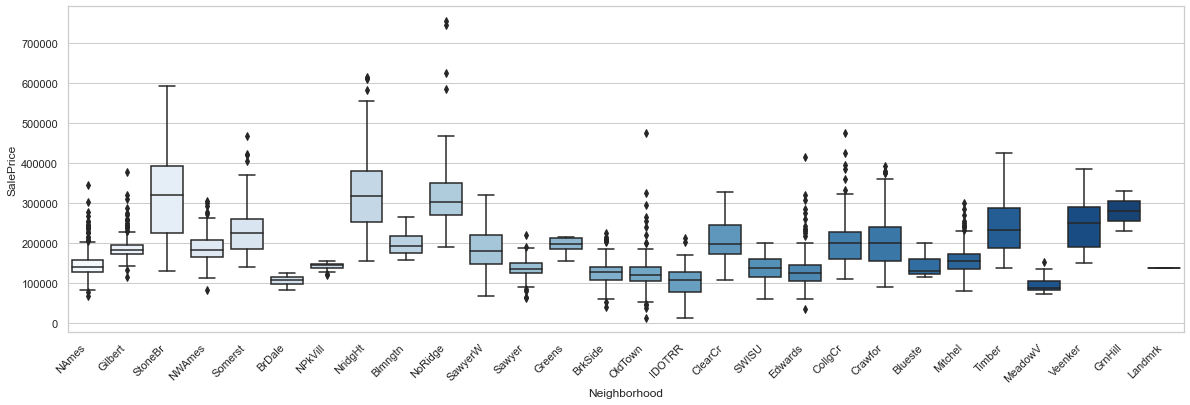

In [24]:

plt.figure(figsize=(20, 6))
boxplot = sns.boxplot(x="Neighborhood", y=Y, data=df, palette='Blues')
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45, horizontalalignment='right')

In [25]:
plt.figure(figsize=(20, 6))
boxplot = sns.boxplot(x="House Style", y=, data=df, palette='Blues')
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45, horizontalalignment='right')

SyntaxError: invalid syntax (<ipython-input-25-20eb370d1c87>, line 2)

In [ ]:
corr_mat = df[df_cols].corr()
corr_mat


In [ ]:
plt.figure(figsize=(30, 30))

sns.heatmap(corr_mat)

In [ ]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
corr=corr_mat.loc[set(corr_mat.index) - set([Y])][Y] #Removes Y var (dependent var) from correlation matrix, bc corr is always 1

corr_plot= sns.scatterplot(data=corr.sort_values(ascending=False))
None



## Correlation Plot
**VRAAG**: Hoe kan je de pairplot verticaal weergeven, zonder de x- en y-as van de subplots om te draaien?

In [ ]:
sns.pairplot(data=df, x_vars = df_cols, y_vars=[Y])

In [30]:
df.corr()["SalePrice"].sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647812
Garage Area        0.640381
Total Bsmt SF      0.632164
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.508882
Mas Vnr Area       0.502196
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.432862
Lot Frontage       0.340256
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.275823
2nd Flr SF         0.269373
Lot Area           0.266549
Bsmt Unf SF        0.182895
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Mo Sold            0.035259
3Ssn Porch         0.032225
BsmtFin SF 2       0.006018
Misc Val          -0.015691
Yr Sold           -0.030569
Order             -0.031408
Bsmt Half Bath    -0.035817
Low Qual Fin SF   -0.037660
MS SubClass       -0.085092
Overall Cond      -0